In [26]:
import numpy as np

from models import Mw
from funcs import plot_policyfunc, plot_valuefunc ,plot_price_dev,plot_share_dev
from scipy.interpolate import interp1d #functional interpolation


import matplotlib.pyplot as plt #plotting


### helper funcs

In [85]:

def value_it_fixedComp(s_grid_,
                       p_grid_,
                       outsidePolicy=0.5,
                       eta=0.1,
                       beta=0.95,
                       max_iterations=2000):

    """
    value iteration when competitors always charge a fixed price
    Args,
        s_grid (list): grid of states
        p_grid (list): grid of policies
    Returns:
        Dictionary of value and policy functions: {'value_function','policy_function'}
    """


    s_grid = np.array(s_grid_)
    p_grid = np.array(p_grid_)
    v_curr = np.ones(len(s_grid_))
    p_curr = np.ones(len(s_grid_), dtype=int)  # Initialize as integers for indexing

    for it in range(max_iterations):
        interp_v_func = interp1d(s_grid, v_curr, kind='linear', fill_value='extrapolate')

        new_weight_a = s_grid[:, np.newaxis] * (1 - eta * p_grid)
        new_weight_b = (1 - s_grid[:, np.newaxis]) * (1 - eta * outsidePolicy)
        new_state = new_weight_a / (new_weight_a + new_weight_b)
        future_u = beta * interp_v_func(new_state)

        values = p_grid[np.newaxis, :] * s_grid[:, np.newaxis] + future_u
        v_new = np.max(values, axis=1)
        p_curr = p_grid[np.argmax(values, axis=1)]

        if np.linalg.norm(v_new - v_curr) < 0.00001:
            print('converged successfully in ' + str(it) + ' iterations')
            break
        else:
            v_curr = v_new

        if it == (max_iterations - 1):
            print('did not terminate after ' + str(it) + ' iterations')

    return {'value_function': v_curr.tolist(), 'policy_function': p_curr.tolist(),
            'values': values}


### Analysis

In [86]:

# problem setup
n_points = 1000
Beta = 0.99
Eta = 0.3
s_list = [ (1/(n_points))*(i+1) for i in range(0,n_points-1)]  #values for weights
p_list = [ (1/(n_points))*(i) for i in range(0,n_points+1)] #values for prices - allows the boundaries

converged successfully in 1401 iterations


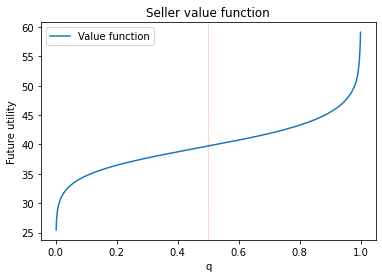

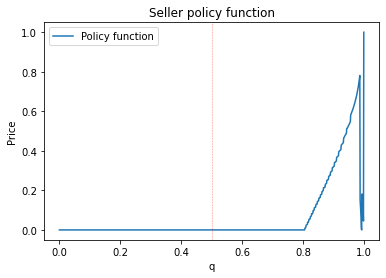

In [87]:
res = value_it_fixedComp(s_list,p_list,
                         beta=Beta,
                         outsidePolicy=0.5,
                         eta=Eta)

plot_valuefunc(s_list,res['value_function'])

plot_policyfunc(s_list,res['policy_function'])


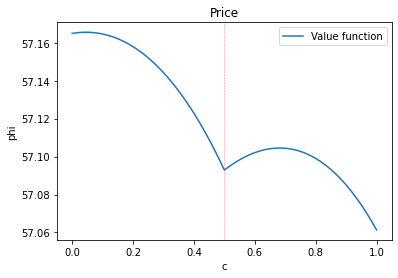

In [91]:

plt.plot(p_list,res['values'][997].tolist(), label='Value function')
plt.axvline(x=0.5, color='red', linestyle='--',alpha=0.5,linewidth=0.5)
plt.xlabel('c')
plt.ylabel('phi')
plt.title('Price')
plt.legend()
plt.show()


[0.739163627379454,
 0.7390836932683383,
 0.7390037589006032,
 0.7389238242762473,
 0.7388438893952698,
 0.7387639542576694,
 0.7386840188634455,
 0.7386040832125962,
 0.7385241473051212,
 0.738444211141019,
 0.738364274720289,
 0.7382843380429295,
 0.7382044011089398,
 0.7381244639183188,
 0.7380445264710654,
 0.7379645887671786,
 0.7378846508066573,
 0.7378047125895003,
 0.7377247741157068,
 0.7376448353852754,
 0.7375648963982052,
 0.7374849571544954,
 0.7374050176541442,
 0.7373250778971513,
 0.7372451378835153,
 0.7371651976132352,
 0.7370852570863097,
 0.737005316302738,
 0.7369253752625189,
 0.7368454339656515,
 0.7367654924121346,
 0.7366855506019669,
 0.7366056085351478,
 0.7365256662116761,
 0.7364457236315504,
 0.7363657807947699,
 0.7362858377013335,
 0.7362058943512403,
 0.7361259507444888,
 0.7360460068810784,
 0.7359660627610077,
 0.7358861183842759,
 0.7358061737508816,
 0.735726228860824,
 0.735646283714102,
 0.7355663383107145,
 0.7354863926506603,
 0.7354064467339383